In [1]:
!pip install tf_slim
!pip install tf-models-official
!pip install lvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 352 kB 5.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 4.4 MB/s 
     |████████████████████████████████| 99 kB 6.0 MB/s 
     |████████████████████████████████| 636 kB 38.1 MB/s 
     |████████████████████████████████| 511.8 MB 9.0 kB/s 
     |████████████████████████████████| 1.1 MB 51.9 MB/s 
     |████████████████████████████████| 116 kB 55.3 MB/s 
     |████████████████████████████████| 43 kB 2.1 MB/s 
     |████████████████████████████████| 238 kB 51.2 MB/s 
     |████████████████████████████████| 4.6 MB 41.4 MB/s 
     |████████████████████████████████| 1.3 MB 45.3 MB/s 
     |████████████████████████████████| 1.6 MB 42.4 MB/s 
     |████████████████████████████████| 438 kB 56.0 MB/s 
     |████████████████████████████████| 5.8 MB 35.0 M

In [2]:
import os
%cd /content
!git clone --quiet https://github.com/tensorflow/models.git
%cd /content/models/
#!git checkout 58d19c67e1d30d905dd5c6e5092348658fed80af
!apt-get update && apt-get install -y -qq protobuf-compiler python-pil python-lxml python-tk
!pip install -q Cython contextlib2 pillow lxml matplotlib
!pip install -q pycocotools
%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.
os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/'
!python object_detection/builders/model_builder_test.py

/content
/content/models
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:11 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,540 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
H

In [3]:
import zipfile
local_zip = "/content/fine_tuned_model.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/content/fine_tuned_model")
zip_ref.close()

In [4]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
import tensorflow as tf
import numpy as np

## Revisar que la ruta sea la misma de la carpeta.
PATH_TO_MODEL_DIR = "/content/fine_tuned_model/content/fine_tuned_model"
PATH_TO_SAVE_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

detect_fn = tf.saved_model.load(PATH_TO_SAVE_MODEL)

In [6]:
# Cargamos el label map para utilizarlo.
label_map_pbtxt_fname = "/content/label_map.pbtxt"
category_index = label_map_util.create_category_index_from_labelmap(label_map_pbtxt_fname)

In [9]:
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Importamos la imagen
image_path = "/content/facemask-1.jpeg"

# La convertimos a array
image_np = np.array(Image.open(image_path))

# La convertimos a tensor y la agregamos una dimensión para que pueda leerla nuestro modelo
input_tensor = tf.convert_to_tensor(image_np)
input_tensor = input_tensor[tf.newaxis, ...]

# Realizamos la detección del objeto
detections = detect_fn(input_tensor)

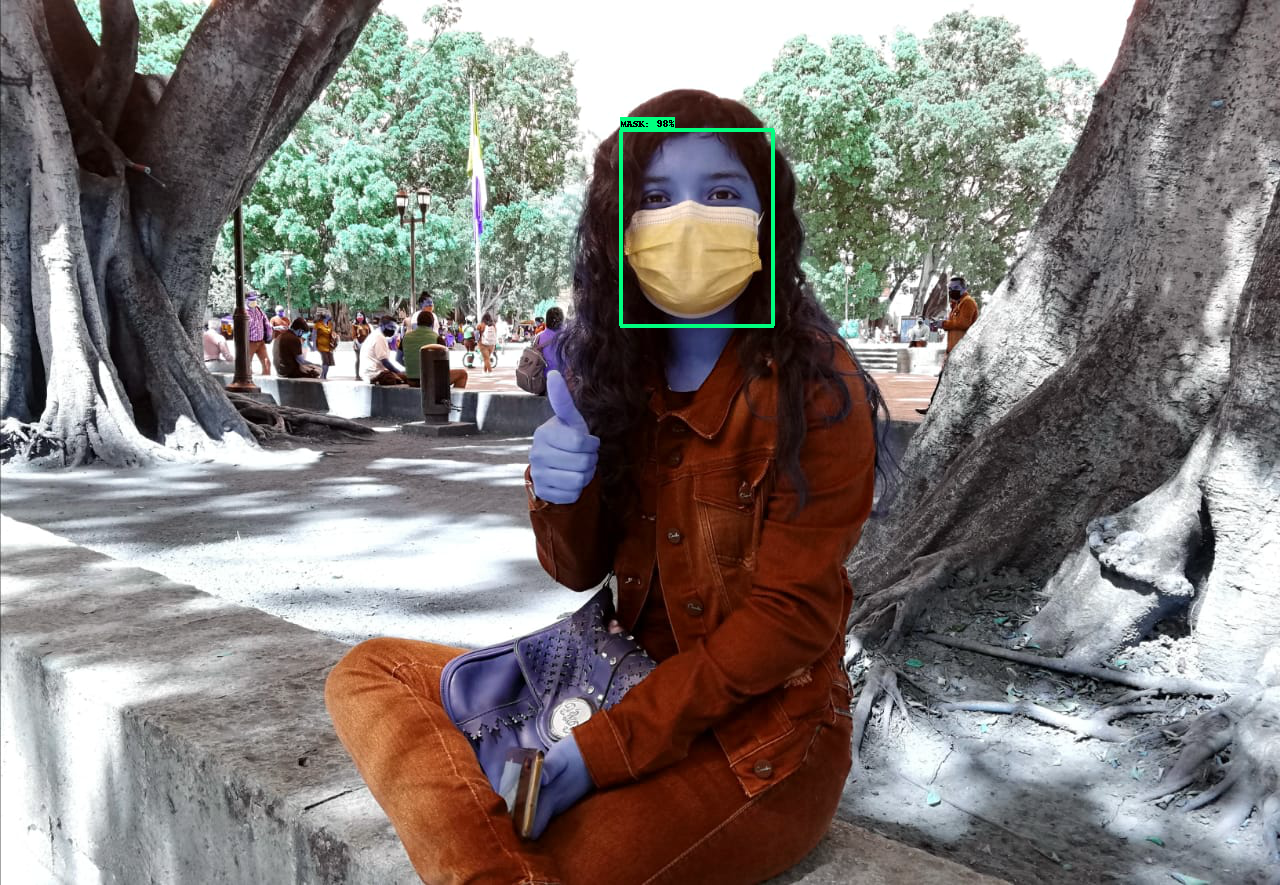

In [10]:
# Analizamos cuántas detecciones se obtuvieron
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0,:num_detections].numpy() for key, value in detections.items()}

detections['num_detections'] = num_detections

detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

# Tomamos una imagen y la copiamos para dibujar los bounding box
image_np_with_detections = image_np.copy()

# Utilizamos la libreria de obejct detection para visualizar le bounding box y la clasificación
viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections,
    detections['detection_boxes'],
    detections['detection_classes'],
    detections['detection_scores'],
    category_index,
    max_boxes_to_draw=10,
    min_score_thresh=0.6,
    use_normalized_coordinates = True
)


# Visualizamos resultados
cv2_imshow(image_np_with_detections)

In [11]:
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Importamos la imagen
image_path = "/content/facemask-1.jpeg"

# La convertimos a array
image_np = np.array(Image.open(image_path))

# La convertimos a tensor y la agregamos una dimensión para que pueda leerla nuestro modelo
input_tensor = tf.convert_to_tensor(image_np)
input_tensor = input_tensor[tf.newaxis, ...]

# Realizamos la detección del objeto
detections = detect_fn(input_tensor)

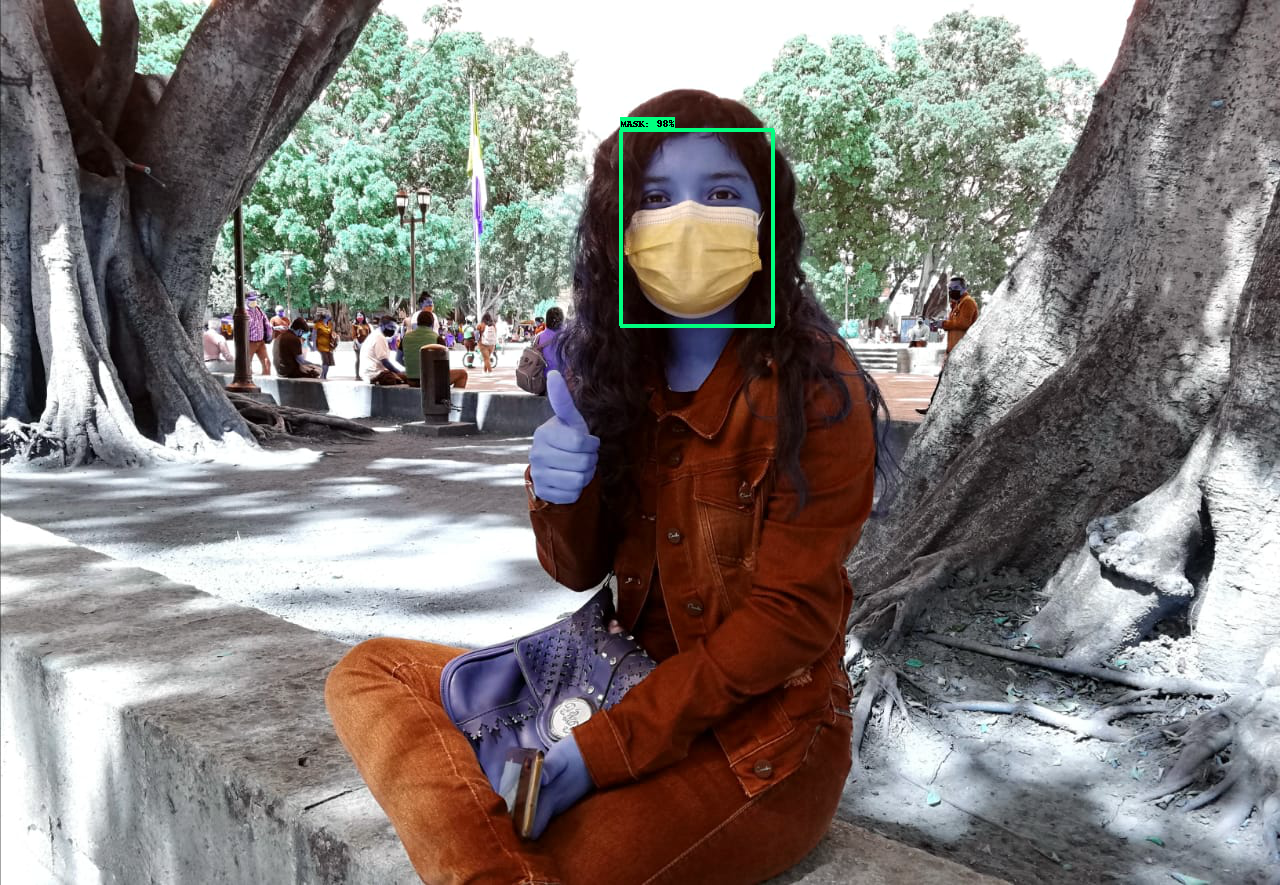

In [12]:
# Analizamos cuántas detecciones se obtuvieron
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0,:num_detections].numpy() for key, value in detections.items()}

detections['num_detections'] = num_detections

detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

# Tomamos una imagen y la copiamos para dibujar los bounding box
image_np_with_detections = image_np.copy()

# Utilizamos la libreria de obejct detection para visualizar le bounding box y la clasificación
viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections,
    detections['detection_boxes'],
    detections['detection_classes'],
    detections['detection_scores'],
    category_index,
    max_boxes_to_draw=10,
    min_score_thresh=0.6,
    use_normalized_coordinates = True
)


# Visualizamos resultados
cv2_imshow(image_np_with_detections)

In [26]:
import numpy as np
import imutils
import time
import dlib
import cv2
from PIL import Image
import matplotlib.pyplot as plt 
from imutils.video import VideoStream 
from imutils.video import FPS

In [28]:
# Ruta del video (Se debe cargar de manera manual)
PATH_VIDEO = "/content/test_video.mp4"

# Ruta del video en donde almacenaremos los resultados
PATH_OUTPUT = "/content/video_out.mp4"

# Cuántos frames vamos a saltarnos (Durante estos frames nuestro algoritmo de seguimiento funciona)
SKIP_FPS = 10

# Cuál será el umbral mínimo par que se considere una detección
TRESHOLD = 0.75

# Cargamos el video
vs = cv2.VideoCapture(PATH_VIDEO)

# Inicializamos el writer para poder guardar el video
writer = None

# Definimos ancho y alto
W = int(vs.get(cv2.CAP_PROP_FRAME_WIDTH))
H = int(vs.get(cv2.CAP_PROP_FRAME_HEIGHT))

totalFrame = 0

# Los FPS nos van a permitir ver el rendimiento de nuestro modelo y si funciona en tiempo real.
fps = FPS().start()

# Definimos el formato del archivo resultante y las rutas.
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
writer = cv2.VideoWriter(PATH_OUTPUT, fourcc, 20.0, (W, H), True)

# Bucle que recorre todo el video
while True:
    # Leemos el primer frame
    ret, frame = vs.read()

    # Si ya no hay más frame, significa que el video termino y por tanto se sale del bucle
    if frame is None:
        break
    
    if totalFrame % SKIP_FPS == 0:
        #Tomamos la imagen la convertimos a array luego a tensor
        image_np = np.array(frame)

        input_tensor = tf.convert_to_tensor(image_np)
        input_tensor = input_tensor[tf.newaxis, ...]

        # Predecimos los objectos y clases de la imagen
        detections = detect_fn(input_tensor)

        num_detections = int(detections.pop('num_detections'))
        detections = {key: value[0,:num_detections].numpy() for key, value in detections.items()}

        detections['num_detections'] = num_detections
        detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

        # Tomamos una imagen y la copiamos para dibujar los bounding box
        image_np_with_detections = frame.copy()

        # Utilizamos la libreria de obejct detection para visualizar le bounding box y la clasificación
        viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes'],
            detections['detection_scores'],
            category_index,
            max_boxes_to_draw=10,
            min_score_thresh=0.6,
            use_normalized_coordinates = True
        )

    writer.write(image_np_with_detections)
    totalFrame += 1
    fps.update()

# Terminamos de analizar FPS y mostramos resultados finales
fps.stop()

print("Tiempo completo {}".format(fps.elapsed()))
print("Tiempo aproximado por frame {}".format(fps.fps()))

# Cerramos el stream the almacenar video y de consumir el video.
writer.release()
vs.release()



Tiempo completo 13.933341
Tiempo aproximado por frame 66.74637475677943
